# ECO 590: Final Project by Kate Fong


## _Part 1: Webscraped Data_

(For the first version of this code, I manually corrected all the misaligned information (took forever!!); below code automates this process (yay) )

- To start webscraping, I first used the Inspect function to see which tags corresponded with what information on the webpage. The code below works by going into the top 100 movies for the year and collecting all the data on this page. Here, the for loop collects the rotten tomato score, the number of reviews, the name of the movie, and the link to the movie's individual webpage. There was other data that was not relevant for my research that appears on the webpage. To avoid the unecessary data, in the for loop I specified that the for loop only gather information from the top 100 table by using the table class table tags.
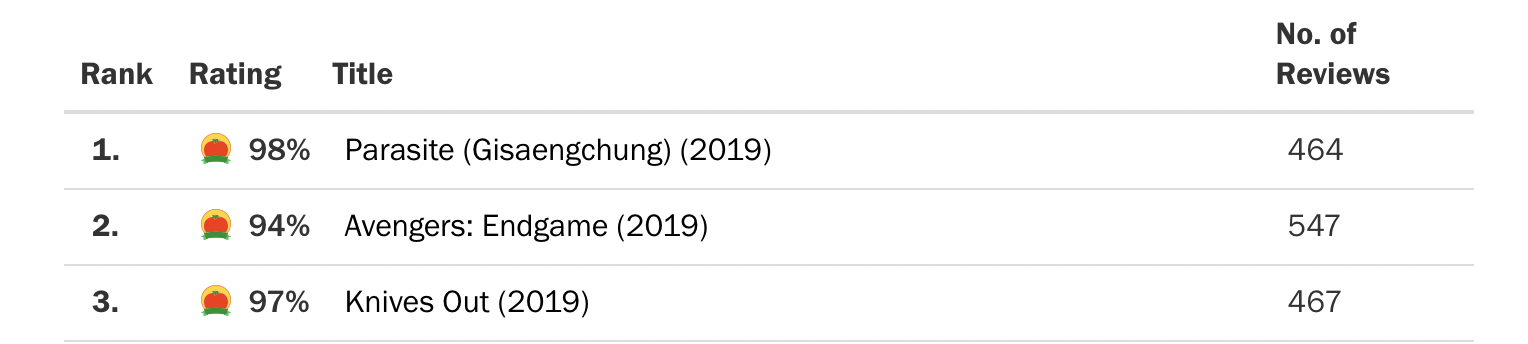


- From the links that were webscraped, I use another for loop to go through every link to gather the movie-specific information. The issue here is that each piece of information has the same tag, so I was unable to individually call each specific piece of information (genre, rating, etc). I had to gather both the right(R, Comedy, Korean, etc) and the left (Rating, Genre, etc) and zip the two columns of information in the for loop to make sure the data aligned with the correct label. I repeat this same mechanism for all three years.
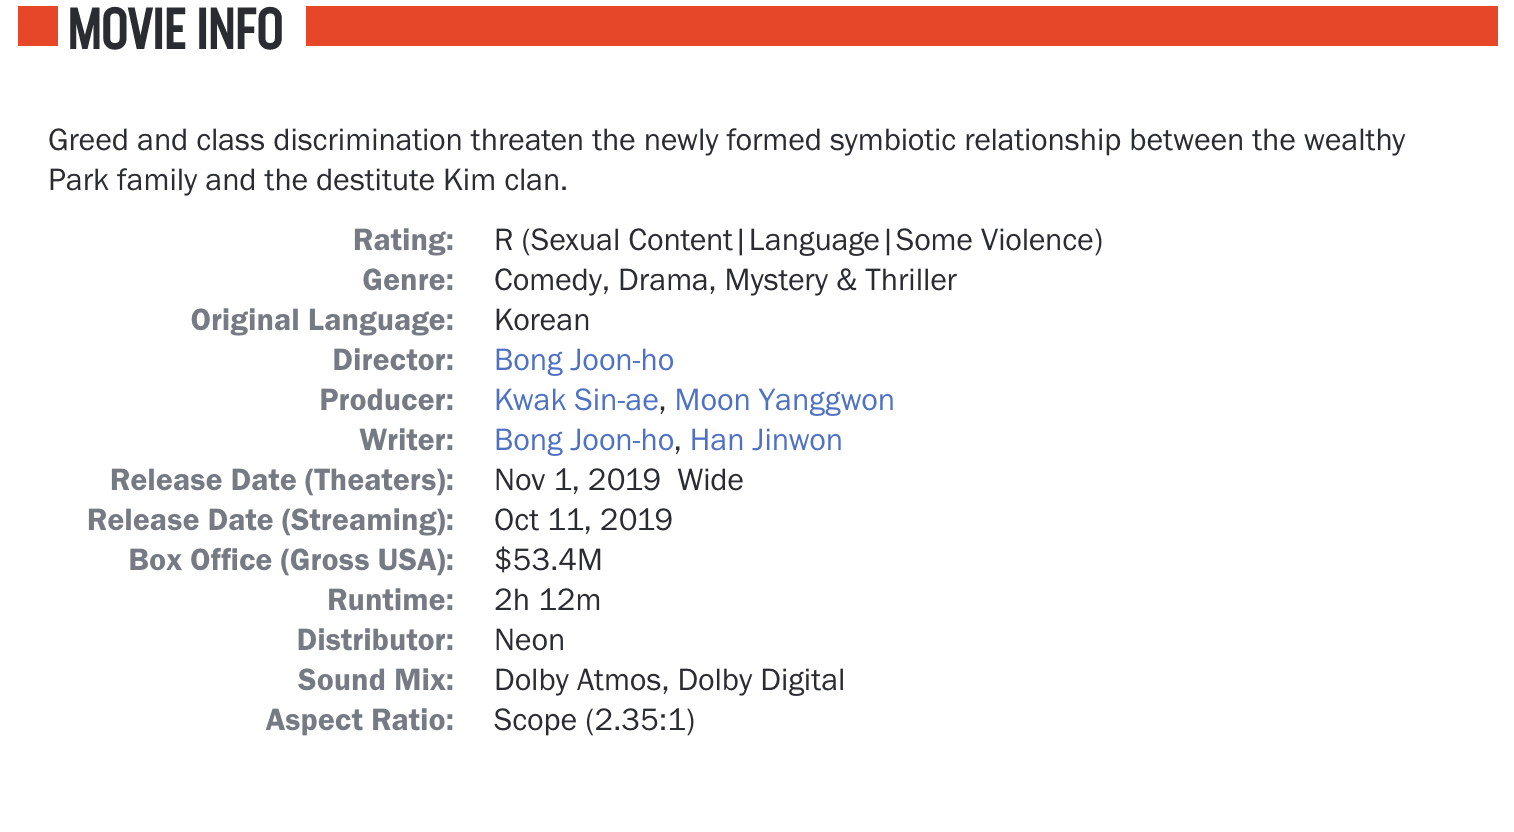

In [4]:
cd '/Users/katefong/Documents/Eco 590 /Weekly Tasks/final-project-kate-fong'

/Users/katefong/Documents/Eco 590 /Weekly Tasks/final-project-kate-fong


In [5]:
import requests  #importing the necessary packages 
import numpy as np
import pandas as pd
import pprint
from bs4 import BeautifulSoup
import math

#making the graphs open fully so that I am able to see all of the webscraped data to determine what needs to be cleaned
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### 2021 Rotten Tomatoes

In [6]:
top2021_url = 'https://www.rottentomatoes.com/top/bestofrt/?year=2021' #top 2021 url
response = requests.get(top2021_url, headers={'User-Agent': 'Chrome'}) #getting the response from the get request
response #response 200 means success

top2021_soup = BeautifulSoup(response.text, 'html.parser') #using Beautifyl soup to parse the html
#print(top2021_soup.prettify()) #printing the html using the prettify package

In [7]:
#pulling the titles specifically within the table chart on the website page and assigning it to a variable
rt2021_titles = top2021_soup.find('table',{'class':'table'}).find_all('a', {'class': 'unstyled articleLink'}) #https://www.youtube.com/watch?v=4W21UMc-eO0
#pulling the rotten tomato score by specifically looking in the table and assigning that to a variable
ratings_2021 = top2021_soup.find('table',{'class':'table'}).select('span.tMeterScore') 
#selecting all of the links with the associated tags and assigning it to a variable
links_2021 = [a.attrs.get('href') for 
                  a in top2021_soup.find('table',{'class':'table'}).select('a', {'class': 'unstyled articleLink'})] 
#selecting the number of reviews speciifcally looking into the main table on the page and assigning it to a variable
numofreviews_2021 = top2021_soup.find('table',{'class':'table'}).find_all('td', {'class': 'right hidden-xs'}) 

rt2021 = [] #creating a new list that we will add to later

for i in range(len(rt2021_titles)): #looking at each element in the titles variable
    rt2021_titles_string= rt2021_titles[i].get_text() #we are getting the text from the variable and assigning it to the variable
    movie2021 = (' '.join(rt2021_titles_string.split()).replace('\n', '').replace('(','').replace(')','')) #joining all the elements into one string and splitting the string into a list and then replacing all \n with a space
    (' '.join(rt2021_titles_string.split()).replace('\n', ''))
    ratings_2021_string= ratings_2021[i].get_text() #getting the text from the ratings variable and assigning it to the variable
    ratings2021 = (' ').join(ratings_2021_string.split()).replace('\xa0', '') .replace('%'," ")#joining all the elements into one string and splitting the string a list and assigning this to a varibale ; replacing the specfied characters with a space so that it looks nicer
    links2021_string= links_2021[i] #putting all the elements in the variable into another variable
    links2021 = (' ').join(links2021_string.split()) #making the elements into one string and then splitting the string into a list and assiging to a variable
    numofreviews_2021_string= numofreviews_2021[i].get_text() #getting the text for the number of reviews for each i
    data = {"movietitleyear" : movie2021, #creating a dictionary for my data where the column name is in the () and the data that I want to connect it to is on the other side of the :
           "rtrating" : ratings2021,
             "numofreviews" :  numofreviews_2021_string,
           "link" : links2021}
    rt2021.append(data) #appending our rt2021 list that we created earlier to include the data dictionary we just created
    
rt2021 = pd.DataFrame(rt2021) #turning rt2021 into a dataframe and naming it the variable name
rt2021
movieyearsplit = rt2021["movietitleyear"].str.rsplit(" ", n = 1, expand=True) # since the move title and the year appear in the same column, I am going to seperate the two and so that they are two separate columns of data https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
rt2021["movietitle"]=movieyearsplit[0]  #adding a new column called movietitle and making that the first column in the new movieyearsplit df
rt2021["year"]=movieyearsplit[1] #adding a new column called year and making that the second column in the new movieyear split df
rt2021.drop(columns=['movietitleyear'], inplace=True) #droppping the old movietitleyear column from the dataset


In [8]:
rtinfo21=[]
for i in links_2021:
    url = 'https://www.rottentomatoes.com'+str(i)
    r = requests.get(url, headers={'User-Agent': 'Chrome'}) #getting the info from the link using a GET request
    page= BeautifulSoup(r.text, 'html.parser')
    chart = page.find_all('div',{'class' : 'meta-value','data-qa':'movie-info-item-value'}) #pulling the labels
    chart2 = page.find_all('div',{'class' : 'meta-label subtle'}) #pulling the corresponding information
    texts=[] #initializing an empty list every loop
    texts2 =[]
    for x,z in zip(chart,chart2): #zip is used to merge two lists so that the labels correspond with the correct info
        text2 = z.get_text() #getting text
        text2 = text2.replace("\n", "").replace(" ","").replace(":","") #cleaning the data; removing \n,  ,:
        text = x.get_text()
        text = text.replace("\n", "").replace(" ","")
        texts.append([text2,text])
    texts = pd.DataFrame(texts)
    texts['link'] = str(i) #made a new column called link so we know what info belongs to which movie
    rtinfo21.append(texts)
rtdata21 = pd.concat(rtinfo21)

#pivoting the data so that the label column are the names of each column with the corresponding data in separate columns
pivotedrtdata21=rtdata21.pivot(index='link', columns=0, values=1) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html


### 2020 Rotten Tomatoes

In [14]:
top2020_url = 'https://www.rottentomatoes.com/top/bestofrt/?year=2020' #top 2020 url
response2 = requests.get(top2020_url, headers={'User-Agent': 'Chrome'}) #getting the response from the get request
response2 #response 200 means success

top2020_soup = BeautifulSoup(response2.text, 'html.parser') #using Beautifyl soup to parse the html
#print(top2020_soup.prettify()) #printing the html using the prettify package

In [15]:
rt2020_titles = top2020_soup.find('table',{'class':'table'}).find_all('a', {'class': 'unstyled articleLink'}) #pulling the titles specifically within the table chart on the wesbite page and assigning it to a variable https://www.youtube.com/watch?v=4W21UMc-eO0
ratings_2020 = top2020_soup.find('table',{'class':'table'}).select('span.tMeterScore') #pulling the desired info by looking at the table and selecting the rotten tomato scores and assigning it to a variable
links_2020 = [a.attrs.get('href') for a in top2020_soup.find('table',{'class':'table'}).select('a', {'class': 'unstyled articleLink'})] #pulling the links from the website using the specific tags and assigning this to a variable
numofreviews_2020 = top2020_soup.find('table',{'class':'table'}).find_all('td', {'class': 'right hidden-xs'}) #looking specifically in the main table of the page and pulling the number of reviews using the specific tags and assigning this to a variable

rt2020 = [] #creating an empty list

for i in range(len(rt2020_titles)): #looking at each element in the 2021 movie titles
    rt2020_titles_string= rt2020_titles[i].get_text() #gathering the title text and assigning it to a variable
    movie2020 = (' '.join(rt2020_titles_string.split()).replace('\n', '').replace('(','').replace(')','')) #here we are  joining and then splitting the elements into a list and replacing the specified things with spaces to clean the data
    (' '.join(rt2020_titles_string.split()).replace('\n', ''))
    ratings_2020_string= ratings_2020[i].get_text() #getting the text of ratings
    ratings2020 = (' ').join(ratings_2020_string.split()).replace('\xa0', '').replace('%'," ") #here we are joining and then splitting the elements into a list and replacing the specified characters with a space to clean the data
    links2020_string= links_2020[i] #gather the links in lins_2020 and assigning it to a variable
    links2020 = (' ').join(links2020_string.split()) #splitting into a list
    numofreviews_2020_string= numofreviews_2020[i].get_text() #getting the text and assigning it to a variable
    data = {"movietitleyear" : movie2020,  #creating a dictionary with the name of the columns and the associated data 
           "rtrating" : ratings2020,
            "numofreviews" :  numofreviews_2020_string,
           "link" : links2020}
    rt2020.append(data) #adding this dictionary to the empty list created earlier
    
rt2020 = pd.DataFrame(rt2020) #creating a data frame and giving it a name
rt2020 
movieyearsplit = rt2020["movietitleyear"].str.rsplit(" ", n = 1, expand=True) # since the move title and the year appear in the same column, I am going to seperate the two and so that they are two separate columns of data https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
rt2020["movietitle"]=movieyearsplit[0]  #adding a new column called movietitle and making that the first column in the new movieyearsplit df
rt2020["year"]=movieyearsplit[1] #adding a new column called year and making that the second column in the new movieyear split df
rt2020.drop(columns=['movietitleyear'], inplace=True) #droppping the old movietitleyear column from the dataset
#rt2020

In [16]:
rtinfo20=[]
for i in links_2020:
    url = 'https://www.rottentomatoes.com'+str(i)
    r = requests.get(url, headers={'User-Agent': 'Chrome'}) #getting the info from the link using a GET request
    page= BeautifulSoup(r.text, 'html.parser')
    chart = page.find_all('div',{'class' : 'meta-value','data-qa':'movie-info-item-value'})
    chart2 = page.find_all('div',{'class' : 'meta-label subtle'})
    texts=[]
    texts2 =[] #initializing an empty list every loop
    for x,z in zip(chart,chart2):
        text2 = z.get_text() #getting the text
        text2 = text2.replace("\n", "").replace(" ","").replace(":","") #cleaning the data by removing extra unecessary characters
        text = x.get_text()
        text = text.replace("\n", "").replace(" ","")
        texts.append([text2,text])
    texts = pd.DataFrame(texts)
    texts['link'] = str(i) #adding a new column of the links so we know which info goes with what movie
    rtinfo20.append(texts)
rtdata20 = pd.concat(rtinfo20)

#pivoting the data so that the label column are the names of each column with the corresponding data in separate columns
pivotedrtdata20=rtdata20.pivot(index='link', columns=0, values=1) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html


### 2019 Rotten Tomatoes

In [17]:
top2019_url = 'https://www.rottentomatoes.com/top/bestofrt/?year=2019' #top 2019 url
response3 = requests.get(top2019_url, headers={'User-Agent': 'Chrome'}) #getting the response from the get request
response3 #response 200 means success

top2019_soup = BeautifulSoup(response3.text, 'html.parser') #using Beautifyl soup to parse the html
#print(top2019_soup.prettify()) #printing the html using the prettify package

In [18]:
rt2019_titles = top2019_soup.find('table',{'class':'table'}).find_all('a', {'class': 'unstyled articleLink'}) #pulling the titles specifically within the table chart on the wesbite page and assigning it to a variable https://www.youtube.com/watch?v=4W21UMc-eO0
ratings_2019 = top2019_soup.find('table',{'class':'table'}).select('span.tMeterScore') #looking in the link that we got a get response from in the above code, I'm looking specifically within the main table region to specifically select the rt score using the specic tags
links_2019 = [a.attrs.get('href') for a in top2019_soup.find('table',{'class':'table'}).select('a', {'class': 'unstyled articleLink'})] #gathering the links see on the website by using the specific tags
numofreviews_2019 = top2019_soup.find('table',{'class':'table'}).find_all('td', {'class': 'right hidden-xs'}) #specifically looking at the table to find the number of reviews and extracting this info and assigning it to a variable

rt2019 = [] #creating an empty list

for i in range(len(rt2019_titles)): #for each element in the variable rt2019_titles
    rt2019_titles_string= rt2019_titles[i].get_text() #gathering the text and assigning it to a variable
    movie2019 = (' '.join(rt2019_titles_string.split()).replace('\n', '').replace('(','').replace(')','')) #converting to a list and replacing \n and () with spaces to clean the data
    (' '.join(rt2019_titles_string.split()).replace('\n', '')) 
    ratings_2019_string= ratings_2019[i].get_text() #gathering the text and assigning it to a variable
    ratings2019 = (' ').join(ratings_2019_string.split()).replace('\xa0', '').replace('%'," ") #converting to a list and cleaning up the data by replacing the specified characters with spaces
    links2019_string= links_2019[i] #gathering the elements and assigning it to a variable
    links2019 = (' ').join(links2019_string.split())   #joins elements to a string and then converts it into a list
    numofreviews_2019_string= numofreviews_2019[i].get_text() #getting the text and placing it into the variable
    data = {"movietitleyear" : movie2019, #creating a dictionary with the column titles in the "" and the data we'd like to have corresponding to the right of the :
           "rtrating" : ratings2019,
            "numofreviews" :  numofreviews_2019_string,
           "link" : links2019}
    rt2019.append(data) #adding the dictionary we just created to the empty list
    
rt2019 = pd.DataFrame(rt2019) #creating the dataframe
rt2019
movieyearsplit = rt2019["movietitleyear"].str.rsplit(" ", n = 1, expand=True) # since the move title and the year appear in the same column, I am going to seperate the two and so that they are two separate columns of data https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
rt2019["movietitle"]=movieyearsplit[0]  #adding a new column called movietitle and making that the first column in the new movieyearsplit df
rt2019["year"]=movieyearsplit[1] #adding a new column called year and making that the second column in the new movieyear split df
rt2019.drop(columns=['movietitleyear'], inplace=True) #droppping the old movietitleyear column from the dataset
#rt2019
# rt2019.movietitle19.str.rsplit(" ", n = 1, expand=True) # splitting the movies from the years into two separate columns; doing r split to split the column at the first space from the RIGHT!! https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

In [19]:
rtinfo19=[]
for i in links_2019:
    url = 'https://www.rottentomatoes.com'+str(i)
    r = requests.get(url, headers={'User-Agent': 'Chrome'}) #getting the info from the link using a GET request
    page= BeautifulSoup(r.text, 'html.parser')
    chart = page.find_all('div',{'class' : 'meta-value','data-qa':'movie-info-item-value'})
    chart2 = page.find_all('div',{'class' : 'meta-label subtle'})
    texts=[]
    texts2 =[]
    for x,z in zip(chart,chart2):
        text2 = z.get_text()
        text2 = text2.replace("\n", "").replace(" ","").replace(":","")
        text = x.get_text()
        text = text.replace("\n", "").replace(" ","")
        texts.append([text2,text])
    texts = pd.DataFrame(texts)
    texts['link'] = str(i) #adding a new column called link 
    rtinfo19.append(texts)
rtdata19 = pd.concat(rtinfo19)

#pivoting the data so that the label column are the names of each column with the corresponding data in separate columns
pivotedrtdata19=rtdata19.pivot(index='link', columns=0, values=1) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html


### Putting It All Together

In [44]:
df19 = pd.merge(rt2019, pivotedrtdata19, on='link').drop_duplicates().reset_index()
df20 = pd.merge(rt2020, pivotedrtdata20, on='link').drop_duplicates().reset_index()
df21 = pd.merge(rt2021, pivotedrtdata21, on='link').drop_duplicates().reset_index()
frames = [df19,df20,df21] #making a list out of the dataframes
result = pd.concat(frames).reset_index() #concatting the different data frames on top of one another
#result

### Cleaning Data

In [45]:
#replacing the $ signs in the BoxOffice column with a space
result['BoxOffice(GrossUSA)'] = result['BoxOffice(GrossUSA)'].str.replace('$', '')
#filling the Nan values with a 0 place holder so that we can run the next line of code
result['BoxOffice(GrossUSA)']=result['BoxOffice(GrossUSA)'].fillna(0)
#converting all the values to the same units; getting rid of 'M' and 'K'
result['BoxOffice(GrossUSA)']= result['BoxOffice(GrossUSA)'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int) #https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe
#changing the 0 back into NaN
result['BoxOffice(GrossUSA)']=result['BoxOffice(GrossUSA)'].replace(0, np.nan)#https://newbedev.com/python-pandas-replace-0-with-nan-code-example


<ipython-input-45-b0a097773480>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  result['BoxOffice(GrossUSA)'] = result['BoxOffice(GrossUSA)'].str.replace('$', '')


In [46]:
result['Genre'] = result['Genre'].str.split(',').str[0]
result['Rating'] = result['Rating'].str.split('(').str[0]
result['Distributor'] = result['Distributor'].str.split(',').str[0]
#adding a space after all of the capital letters
result['Director'] = result['Director'] .str.replace( r"([A-Z])", r" \1").str.strip() #https://stackoverflow.com/questions/58143701/add-space-before-capital-letters-in-a-dataframe-or-column-in-python-using-regex
result['Distributor'] = result['Distributor'] .str.replace( r"([A-Z])", r" \1").str.strip() 
result['Producer'] = result['Producer'] .str.replace( r"([A-Z])", r" \1").str.strip() 
result['Writer'] = result['Writer'] .str.replace( r"([A-Z])", r" \1").str.strip() 
result['SoundMix'] = result['SoundMix'] .str.replace( r"([A-Z])", r" \1").str.strip() 


<ipython-input-46-bf9ac82e9519>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  result['Director'] = result['Director'] .str.replace( r"([A-Z])", r" \1").str.strip() #https://stackoverflow.com/questions/58143701/add-space-before-capital-letters-in-a-dataframe-or-column-in-python-using-regex
<ipython-input-46-bf9ac82e9519>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  result['Distributor'] = result['Distributor'] .str.replace( r"([A-Z])", r" \1").str.strip()
<ipython-input-46-bf9ac82e9519>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  result['Producer'] = result['Producer'] .str.replace( r"([A-Z])", r" \1").str.strip()
<ipython-input-46-bf9ac82e9519>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  result['Writer'] = result['Writer'] .str.replace( r"([A-Z])", r" \1").str.strip()
<ipy

In [47]:
#dropping unecessary columns https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
result = result.drop('Viewthecollection', 1)
result = result.drop('level_0', 1)
result = result.drop('index', 1)

In [48]:
#converting the RunTime that was scraped into minutes ;MOVIERUNTIME IS IN MINUTES
result['MovieRuntime'] = pd.to_timedelta(result['Runtime']).dt.total_seconds() / 60 #https://stackoverflow.com/questions/67439064/converting-a-column-containing-string-time-format-into-minutes
#getting rid of additional 0s
result['MovieRuntime']=result['MovieRuntime'].round() #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html
#getting rid of TVMA rating becuase that is for TV not movies
result['Rating'] = np.where(result['Rating'] == 'TVMA', np.nan, result['Rating'])

In [49]:
result['ReleaseDate(Theater)'] = result['ReleaseDate(Theaters)'].str.replace('wide', '')
result['ReleaseDate(Theater)'] = result['ReleaseDate(Theater)'].str.replace('limited', '')
#result1=result['ReleaseDate(Theaters)'].str.split(' ', expand=True)
result[['TheaterReleaseDate', 'ReleaseType']] = result['ReleaseDate(Theaters)'].str.rsplit(',', 1, expand=True)
#drops the first 5 characters in the ReleaseType column
result['ReleaseType'] = result['ReleaseType'].str[5:] #https://stackoverflow.com/questions/42349572/remove-first-x-number-of-characters-from-each-row-in-a-column-of-a-python-datafr
#dropping extra columns
result = result.drop('TheaterReleaseDate', 1)
result = result.drop('ReleaseDate(Theaters)', 1)
#result

### Creating Binary Variables

In [50]:
#duplicating a column so I can change it to a binary variable
result['streamingornot']=result['ReleaseDate(Streaming)'] #https://stackoverflow.com/questions/57494760/create-duplicate-column-in-pandas-dataframe
result['streamingornot']=result['streamingornot'].fillna(0)
#if the value is not 0, replacing the date with a 1 in this specific column
result['streamingornot'] = np.where(result['streamingornot'] != 0, 1, result['streamingornot']) #https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
#result


In [51]:
result['ReleaseDate(Streaming)'] = result['ReleaseDate(Streaming)'].str.replace(" ","")
result['ReleaseDate(Theater)'] = result['ReleaseDate(Theater)'].str.replace(" ","")

In [52]:
#duplicating a column so I can change it to a binary variable
result['releasetype']=result['ReleaseType'] #https://stackoverflow.com/questions/57494760/create-duplicate-column-in-pandas-dataframe
#if the value is not 0, replacing the date with a 1 in this specific column
result['releasetype'] = np.where(result['releasetype'] == 'wide', 1, result['releasetype']) #https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
result['releasetype'] = np.where(result['releasetype'] == 'limited', 0, result['releasetype'])
#result

### Exporting Data

In [53]:
#exporting data
result.to_csv('finalrottentomato.csv')

# _Part 2: Cleaning Data_
- I did a good chunk of the data cleaning while I was webscraping the data. For example, in the for loops after I get_text, I would use the next line of code to get rid of extra spaces, commas, /n, and any other reoccuring extra character that I did not want and replaced it with ''. One issue that I came across was that the BoxOffice numbers that were pulled were all in different units, some were in thousands and some were in millions. The data I had webscraped also all had dollar signs and the 'K' or 'M' after the numbers (\\$1.7K or \$42.5M). I had to convert these all into integers or else I would not have been able to run any regressions. I also dropped all of the \\$s. Another issue was for the length of the movie variable I webscraped. The data came out in this format: 1h 20m. This is not usable in regressions either, so I had to convert all of these to minutes. Figuring this out took a while, until I came across a quick command that was able to convert the information collected to minutes. Another issue that I spent a lot of time trying to figure out was the presence of extra spaces. The extra spaces made the data csv look weird for some of the columns. However, once I realized the presence of these extra spaces, I was able to replace them with ''.

# _Part 3: Graphs_

In [54]:
#importing packages
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

#importing data into dataframe
path = '/Users/katefong/Documents/Eco 590 /Weekly Tasks/final-project-kate-fong/' #dont forget to add a / !!!!!!
rt = pd.read_csv(path+'finalrottentomato.csv')

### Graph #1

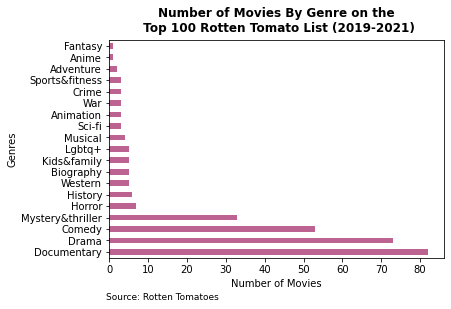

In [63]:
#counting how many movies of each genre there are and plotting this in a horizontal bar chart
rt['Genre'].value_counts().plot(kind='barh', color='#BC6392') #https://mode.com/python-tutorial/counting-and-plotting-in-python/
plt.xlabel('Number of Movies') #labeling x axis
plt.ylabel('Genres') #labeling y axis
plt.title("Number of Movies By Genre on the\n Top 100 Rotten Tomato List (2019-2021)", fontweight='bold', y=1.01) #making the title two lines, bolded ; y= is the location https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle-in-python/21967777
plt.annotate('Source: Rotten Tomatoes', (0.23,-.07), (-80,-20), fontsize=9,
             xycoords='axes fraction', textcoords='offset points', va='top') #adding the source https://stackoverflow.com/questions/41046214/cite-a-data-source-in-matplotlib
plt.savefig('GenreHPlot.png', dpi = 300, bbox_inches='tight')
plt.show()

- This graph shows which genres of movies are most likely to be highly rated and on the top 100 best movies of the year list according to Rotten Tomato critics & reviews from 2019-2021. We can see that Drama and Documentary films are highly rated on the rotten tomatos website. We can see this as a proxy for drama and documentary films in general being the most widely enjoyed.

### Graph #2

<ipython-input-64-59275de96b26>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


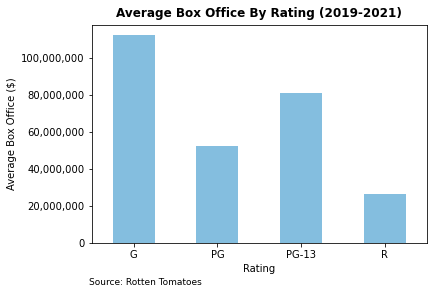

In [64]:
#grouping the data by rating and finding the average box office value for each rating; plotting this information into a bar chart
rt[['Rating','BoxOffice(GrossUSA)']].drop_duplicates().groupby(['Rating']).mean().plot(kind='bar', color='#84BEDF', legend=False)
plt.xlabel('Rating') #labeling x axis
plt.ylabel('Average Box Office ($)') #labeling y axis
plt.title("Average Box Office By Rating (2019-2021)", fontweight='bold', y=1.01) #making the title two lines https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle-in-python/21967777
plt.xticks(rotation=0) # rotating the x axis tick labels https://www.kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.annotate('Source: Rotten Tomatoes', (0.23,-.07), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top') #adding the source https://stackoverflow.com/questions/41046214/cite-a-data-source-in-matplotlib
plt.ticklabel_format(style='plain', axis='y')

#adding commas to the numbers https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


plt.savefig('AvgBoxOfficeBarChart.png', dpi = 300, bbox_inches='tight')

plt.show()


- This graph shows the average box office for each different movie rating. Movies that are rated G have the highest average box office compared to movies that are rated R, which have the lowest average box office. This makes sense because movies that are rated G are available to a greater range of ages, whereas movies that are rated R are only available to 17 years and older. 

### Putting the Two Graphs into 1 figure

<ipython-input-57-8acf76f28118>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


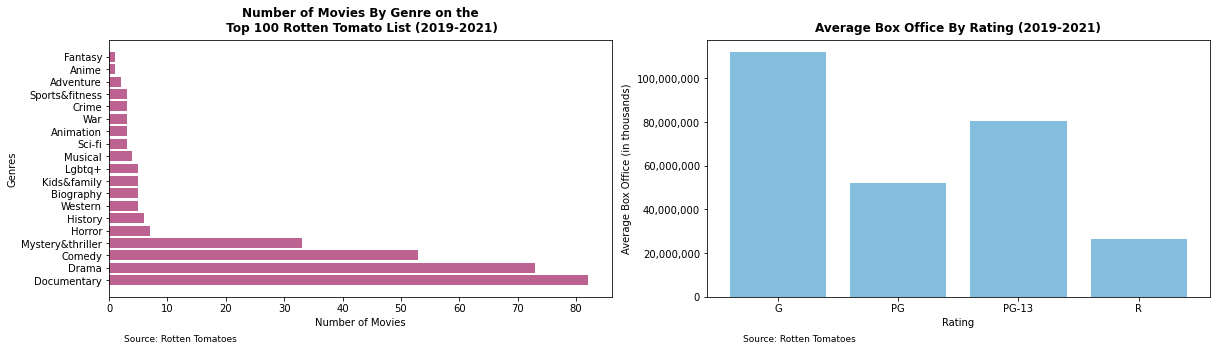

In [57]:
#creating a plot with 1 row and 2 columms
fig, ax = plt.subplots(figsize=(17,5), nrows = 1, ncols = 2)

#counting how many movies there are of each genre and making a data frame called 'unique_genres' and 'count'
genrecount = pd.DataFrame(rt['Genre'].value_counts().rename_axis('unique_genres').reset_index(name='count')) #https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
ax1 = plt.subplot(1, 2,1) #specifying we are working in the 1st plot
ax1.barh(genrecount['unique_genres'],genrecount['count'], color='#BC6392') #creating a horizontal bar chat with the two columns of data that we made
ax1.set_xlabel('Number of Movies') #labeling the x axis
ax1.set_ylabel('Genres') #labeling the y axis
ax1.set_title("Number of Movies By Genre on the\n Top 100 Rotten Tomato List (2019-2021)", fontweight='bold', y=1.01) #making the title two lines https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle-in-python/21967777
ax1.annotate('Source: Rotten Tomatoes', (0.23,-.07), (-101,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top') #adding annotation (source)

ax2 = plt.subplot(1, 2, 2)#specifying we are working in the 2nd plot
avgbobyrating= (rt[['Rating','BoxOffice(GrossUSA)']].drop_duplicates().groupby(['Rating']).mean()) #grouping the data by rating and finding the average box office for each rating and assigning it to a variable
avgbobyratingdf = pd.DataFrame(avgbobyrating['BoxOffice(GrossUSA)'].rename_axis('unique_rating').reset_index(name='avgbo')) #making it a dataframee and specifying the column names
ax2.bar(avgbobyratingdf['unique_rating'],avgbobyratingdf['avgbo'], color='#84BEDF') #plotting a bar graph 
ax2.set_xlabel('Rating') #labeling x axis
ax2.set_ylabel('Average Box Office (in thousands)') #labeling y axis
ax2.set_title("Average Box Office By Rating (2019-2021)", fontweight='bold', y=1.01) #making the title two lines https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle-in-python/21967777
ax2.annotate('Source: Rotten Tomatoes', (0.23,-.07), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top') #adding the source https://stackoverflow.com/questions/41046214/cite-a-data-source-in-matplotlib
ax2.ticklabel_format(style='plain', axis='y')
#adding commas to the numbers https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
fig.tight_layout() #spaces it out so y axis is not overlapping
plt.show()


### Graph #3

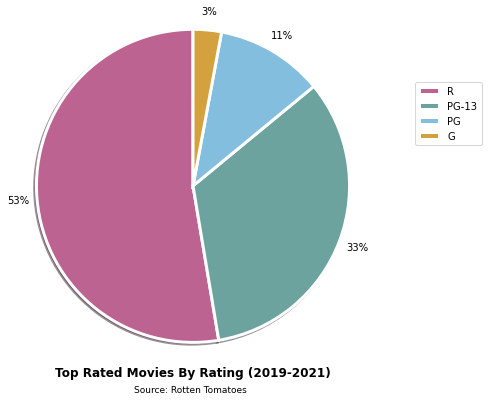

In [65]:
#calculating the percantage of specifcally rated movies that showed up in the top rated list (2019-2021)
distributercount = pd.DataFrame(rt['Rating'].value_counts().rename_axis('rating').reset_index(name='count')) #counting the amount of each rating there was in the df and made this into a new data frame
tot = distributercount['count'].sum() #adding up the count column
distributercount['% total'] = distributercount['count']/tot #finding the % 
distributercount

# Make figure and axes
fig, ax1 = plt.subplots() 

# explode = (0, 0, 0, 0.1, 0,0.1,0,0) #taking a piece of the pie out and highlighting it
#                 #    ^tells which piece of the pie is being highlights
colors = ['#BC6392', '#6DA39E', '#84BEDF', '#D3A23F']
# A standard pie plot; pie is the function                                   v this is how many decimal places 
ax1.pie(distributercount['% total'] , labels=distributercount['rating'] , autopct='%1.0f%%',  shadow=True, startangle=90, labeldistance=None, pctdistance=1.12, 
        radius = 1.8, colors=colors, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }) #making the white edges https://www.python-graph-gallery.com/pie-plot-matplotlib-basic

ax1.legend(bbox_to_anchor=(1.5, 1), loc='upper left') #adding the legend
ax1.set_title('Top Rated Movies By Rating (2019-2021)', y=-.4,fontweight='bold') #adding the title
ax1.annotate('Source: Rotten Tomatoes', (0.23,-.07), (0,-75), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top') #adding the source https://stackoverflow.com/questions/41046214/cite-a-data-source-in-matplotlib


plt.savefig('RatingPieGraph.png', dpi = 300, bbox_inches='tight')
plt.show()



- This shows us that a little over half of the movies that have shown up on the Top 100 Movies List by Rotten Tomatoes from 2019-2021 have been rated R. This is very interesting. This may reflect the tendency of movies that are rated R to contain concepts that are more mature, developed, and deep, thus resulting in a higher critic rating.

# _Part 4: Regressions_

- See R notebook for regressions! A screenshot for analysis context below:


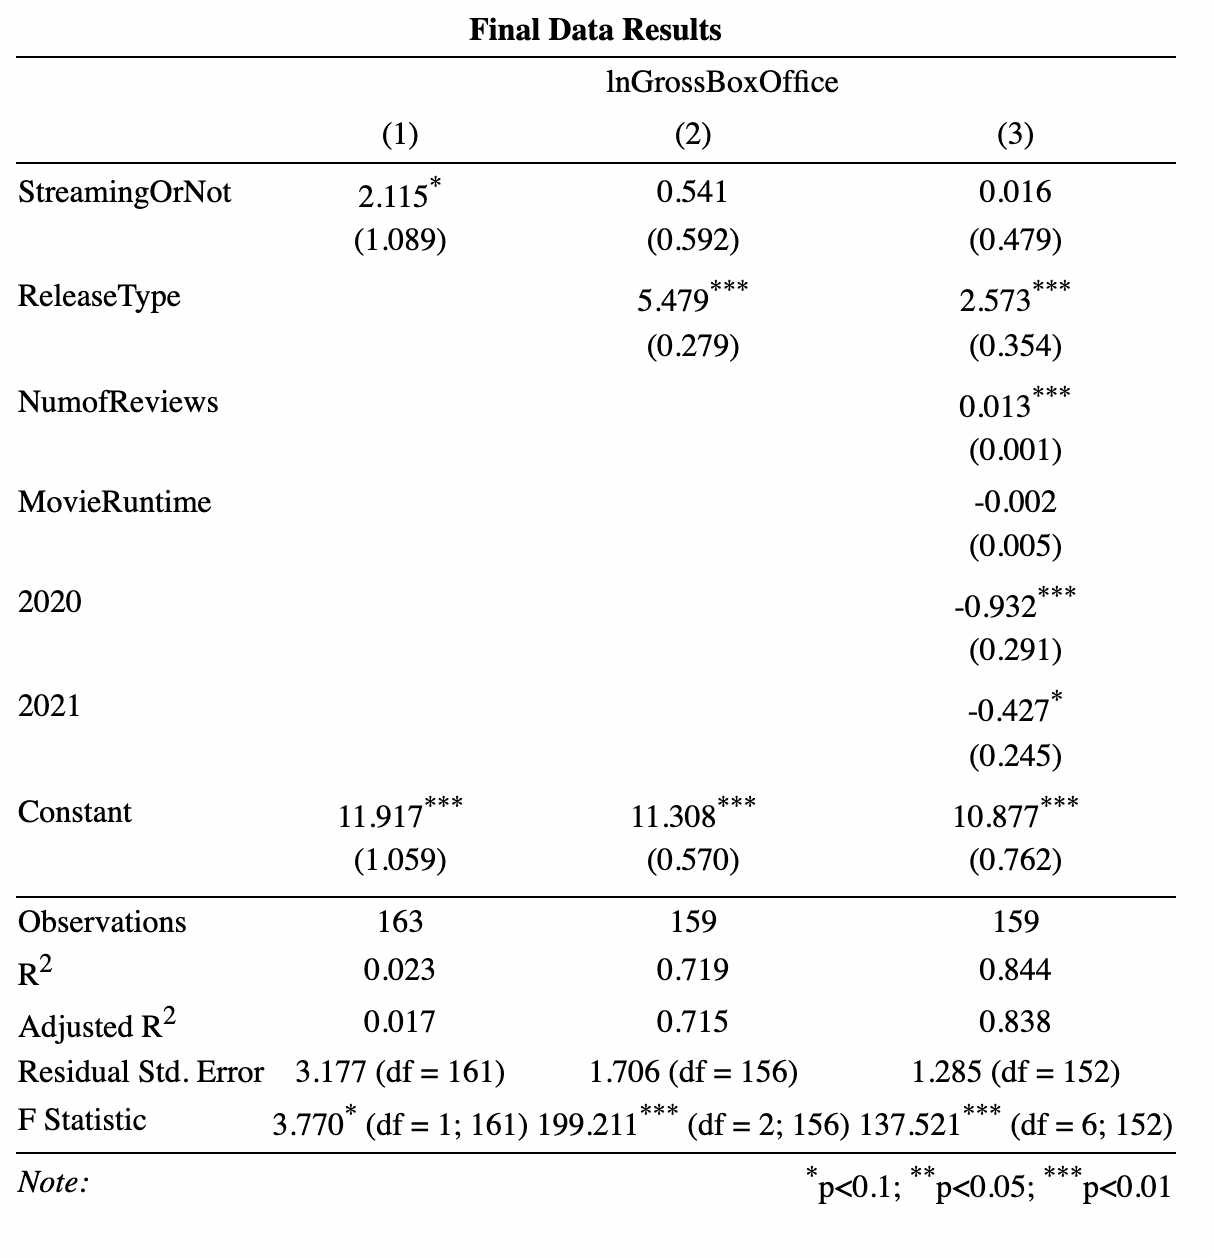

Regression #3 is my preferred regression. Some interpretations:
- A movie that was released both in theaters and on a streaming platform is expected to have a Gross Box Office that is 1.6% greater than a movie that was only released in theaters, ceteris paribus.
- A movie that had a wide release is expected to have a Gross Box Office that is 257.3% greater than a movie that had a limited release, cetaris paribus.
- Each additional review a movie has on Rotten Tomatoes is expected to increase Gross Box Office by 1.3%, ceteris paribus. 
- For each additional minute a movie runs for, Gross Box Office is expected to decrease by .2%, cetaris paribus.
- A movie that was released in 2020 had a Gross Box Office that was 93.2% less than if a movie had been released in 2019, ceteris paribus.

My hypothesis that a movie that was released on a streaming platform would have a lower Box Office is proven wrong by these regressions. According to my regressions, a movie that is released on a streaming platform will actually have a larger Box Office number. This may be because as companies are promoting for the movie to be watched on their streaming platform, people are seeing these ads and actually want to go see them in the movie theater. Advertisements for a movie on a streaming platform may just be extra advertisement spending to promote the movie. For future research, I would include an interaction between the time variables and the streamingornot variable. These past three years have been extremely impactful on people's ability to go to the movie theaters and this interaction may be interesting to see. In the future, I'd also like to making the streamingornot variable more specific. I could not figure out how to only isolate those that released both on streaming and in theaters on the exact same day. This would be extremely helpful in understanding the relationship. I'd also like to include more variables, such as marketing spend, to adjust for different factors that contribute to a movies box office.
